In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv("weather.csv")
data.fillna(method="bfill",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11894 non-null  float64
 2   tmin    11894 non-null  float64
 3   tmax    11894 non-null  float64
 4   prcp    11894 non-null  float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [90]:
data["Date"]=pd.to_datetime(data["time"], format="%d-%m-%Y")
data.sort_values("Date",inplace=True)
data.drop(["time","prcp"],axis=1, inplace=True)

print(f"min date: {data['Date'].min()}")
print(f"max date: {data['Date'].max()}")
print(f"range: {data['Date'].max()-data['Date'].min()}")

#data.set_index("Date",inplace=True)

min date: 1990-01-01 00:00:00
max date: 2022-07-25 00:00:00
range: 11893 days 00:00:00


In [99]:
data.tail()

,tavg,tmin,tmax
Date,,,
2022-07-21,27.6,25.6,30.5
2022-07-22,28.3,26.0,30.5
2022-07-23,28.2,25.8,31.3
2022-07-24,28.1,25.6,30.4
2022-07-25,28.3,25.1,30.2


<AxesSubplot:title={'center':'Daily Average Temperature'}, xlabel='Date'>

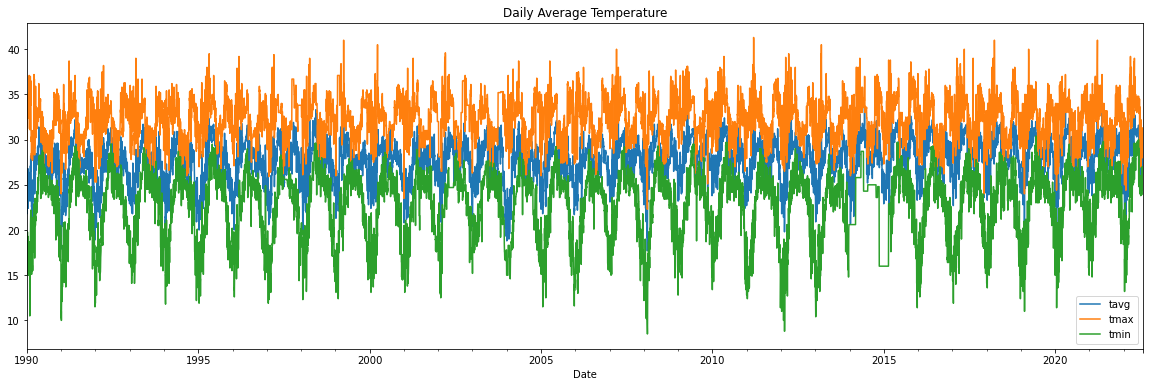

In [92]:
d3 = data[["tavg","tmin","tmax","Date"]]
d3.rolling('1H',on='Date').sum().plot(x='Date',title="Daily Average Temperature",figsize=(20,6))


In [93]:
data = data.set_index('Date').sort_index()
data = data.resample('1D').sum()

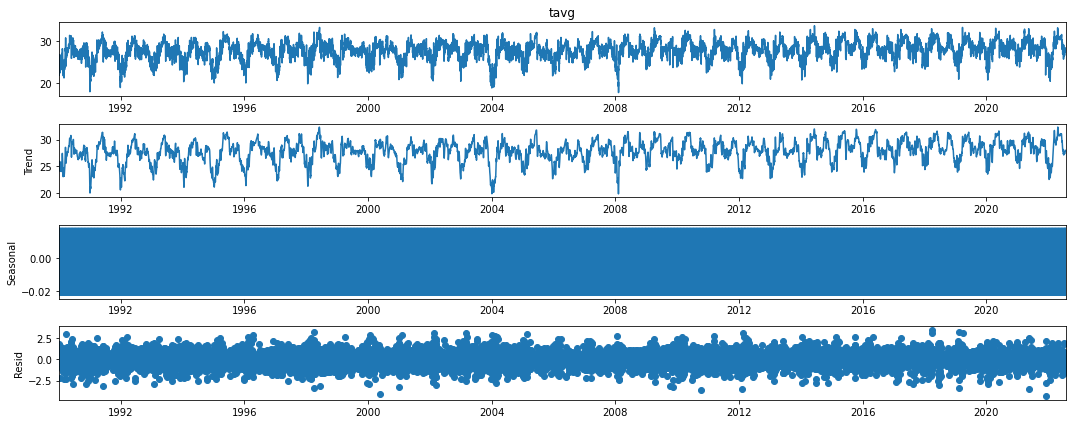

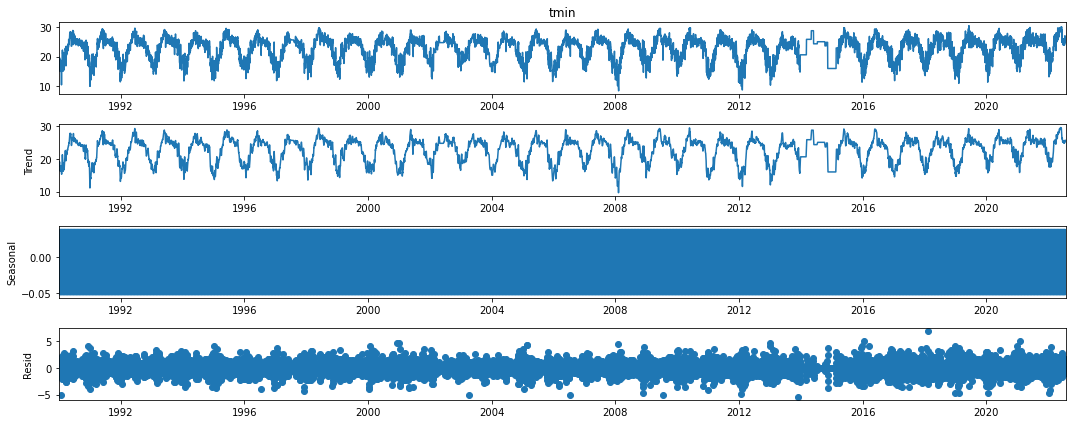

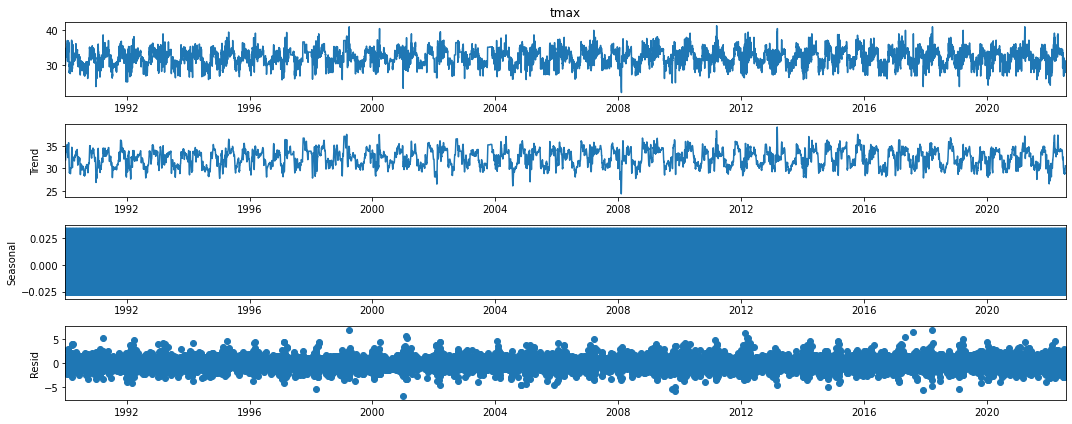

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose


for i in data.columns:
    d2 = seasonal_decompose(data[i],model='additive')
    plt.rc("figure", figsize=(15,6))
    d2.plot()
    plt.show()

In [105]:
pred=[]

from statsmodels.tsa.arima.model import ARIMA
for i in data.columns:
    model = ARIMA(data[i],order=(0,0,1))
    f = model.fit()
    pred.append(f.predict('2022-07-26','2022-12-31'))
    

In [107]:
pred

[2022-07-26    28.098798
 2022-07-27    27.761391
 2022-07-28    27.761391
 2022-07-29    27.761391
 2022-07-30    27.761391
                 ...    
 2022-12-27    27.761391
 2022-12-28    27.761391
 2022-12-29    27.761391
 2022-12-30    27.761391
 2022-12-31    27.761391
 Freq: D, Name: predicted_mean, Length: 159, dtype: float64,
 2022-07-26    23.743845
 2022-07-27    22.636365
 2022-07-28    22.636365
 2022-07-29    22.636365
 2022-07-30    22.636365
                 ...    
 2022-12-27    22.636365
 2022-12-28    22.636365
 2022-12-29    22.636365
 2022-12-30    22.636365
 2022-12-31    22.636365
 Freq: D, Name: predicted_mean, Length: 159, dtype: float64,
 2022-07-26    31.732861
 2022-07-27    32.324954
 2022-07-28    32.324954
 2022-07-29    32.324954
 2022-07-30    32.324954
                 ...    
 2022-12-27    32.324954
 2022-12-28    32.324954
 2022-12-29    32.324954
 2022-12-30    32.324954
 2022-12-31    32.324954
 Freq: D, Name: predicted_mean, Length: 159, dtype: f